In [15]:
!pip install numpy scipy sympy matplotlib networkx qutip

In [16]:
!pip install qwak-sim

In [17]:
!pip install haversine

In [6]:
import numpy as np
from haversine import haversine, Unit

# Coordinates of the points (latitude, longitude)
points = np.array([
    [37.454012, 15.599452],  # Point 0
    [89.071431, 5.808361],   # Point 1
    [73.199394, 86.617615],  # Point 2
    [59.865848, 60.111501],  # Point 3
    [15.601864, 70.807258]   # Point 4
])

# Calculate the distance matrix using the Haversine formula
num_points = points.shape[0]
distance_matrix = np.zeros((num_points, num_points))

for i in range(num_points):
    for j in range(num_points):
        if i != j:
            distance_matrix[i, j] = haversine(points[i], points[j], unit=Unit.KILOMETERS)
        else:
            distance_matrix[i, j] = 0.0  # Distance to itself is zero

# Display the distance matrix
print("Distance Matrix (in kilometers):")
print(distance_matrix)
distance_matrix = (distance_matrix / np.max(distance_matrix))
adj_matrix = distance_matrix

print("Adjacency Matrix:")
print(adj_matrix)

Distance Matrix (in kilometers):
[[   0.         5741.12588092 5442.28836661 3990.93881939 5909.13527982]
 [5741.12588092    0.         1854.37558811 3291.49009904 8229.2624328 ]
 [5442.28836661 1854.37558811    0.         1857.64752746 6483.72420889]
 [3990.93881939 3291.49009904 1857.64752746    0.         4998.15146792]
 [5909.13527982 8229.2624328  6483.72420889 4998.15146792    0.        ]]
Adjacency Matrix:
[[0.         0.69764768 0.66133367 0.4849692  0.71806378]
 [0.69764768 0.         0.22533922 0.39997389 1.        ]
 [0.66133367 0.22533922 0.         0.22573682 0.78788643]
 [0.4849692  0.39997389 0.22573682 0.         0.60736324]
 [0.71806378 1.         0.78788643 0.60736324 0.        ]]


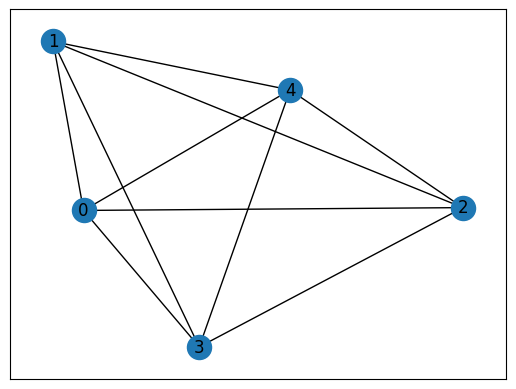

In [13]:
import networkx as nx

G = nx.from_numpy_array(adj_matrix)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True)
plt.show()

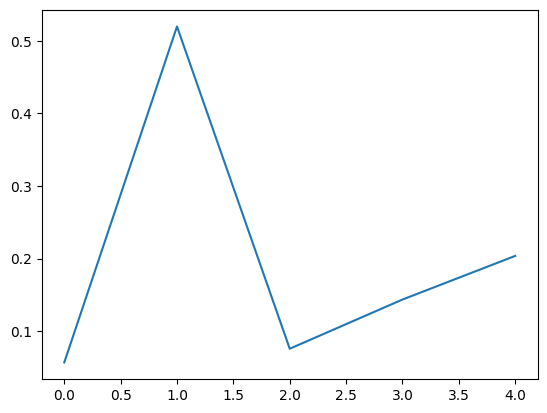

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from qwak.qwak import QWAK

n = 5
t = 10
initState = [n//2,n//2 + 1]
qwak = QWAK(G)
qwak.runWalk(t,initState)

probVec = qwak.getProbVec()
plt.plot(probVec)
plt.show()